In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("../data/raw/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Target Variable

Explore *Loan_Status*

In [6]:
cat_columns = ['Self_Employed','Dependents','Loan_Amount_Term','Gender','Married','Education','Property_Area','Credit_History']
num_columns = ['LoanAmount','ApplicantIncome','CoapplicantIncome']

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

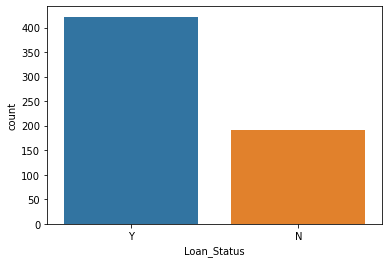

In [7]:
sns.countplot(x=df.Loan_Status) #oversample rejections?

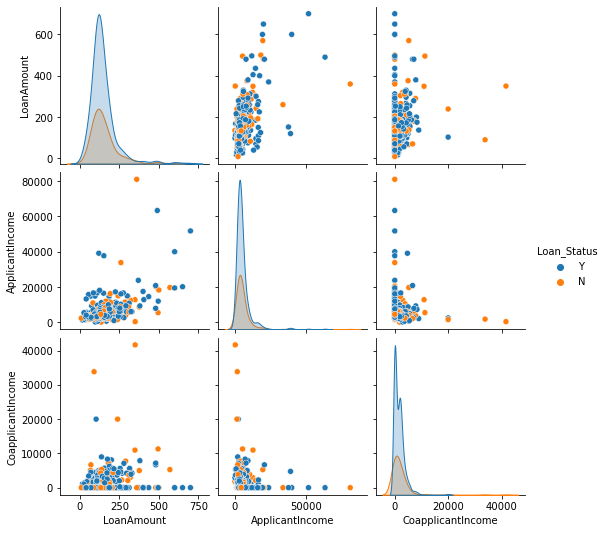

In [8]:
#Applicant income and loan amount requested are correlated
sns.pairplot(data=df,x_vars=num_columns,y_vars=num_columns,hue='Loan_Status')

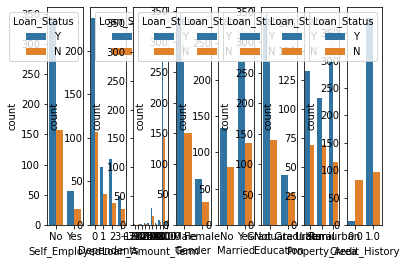

In [9]:
fig,axs = plt.subplots(1,len(cat_columns))
plt.rcParams["figure.figsize"] = (30,10)
for idx,col in enumerate(cat_columns):
    sns.countplot(data=df,x=col,hue="Loan_Status",ax=axs[idx])

# Predictors

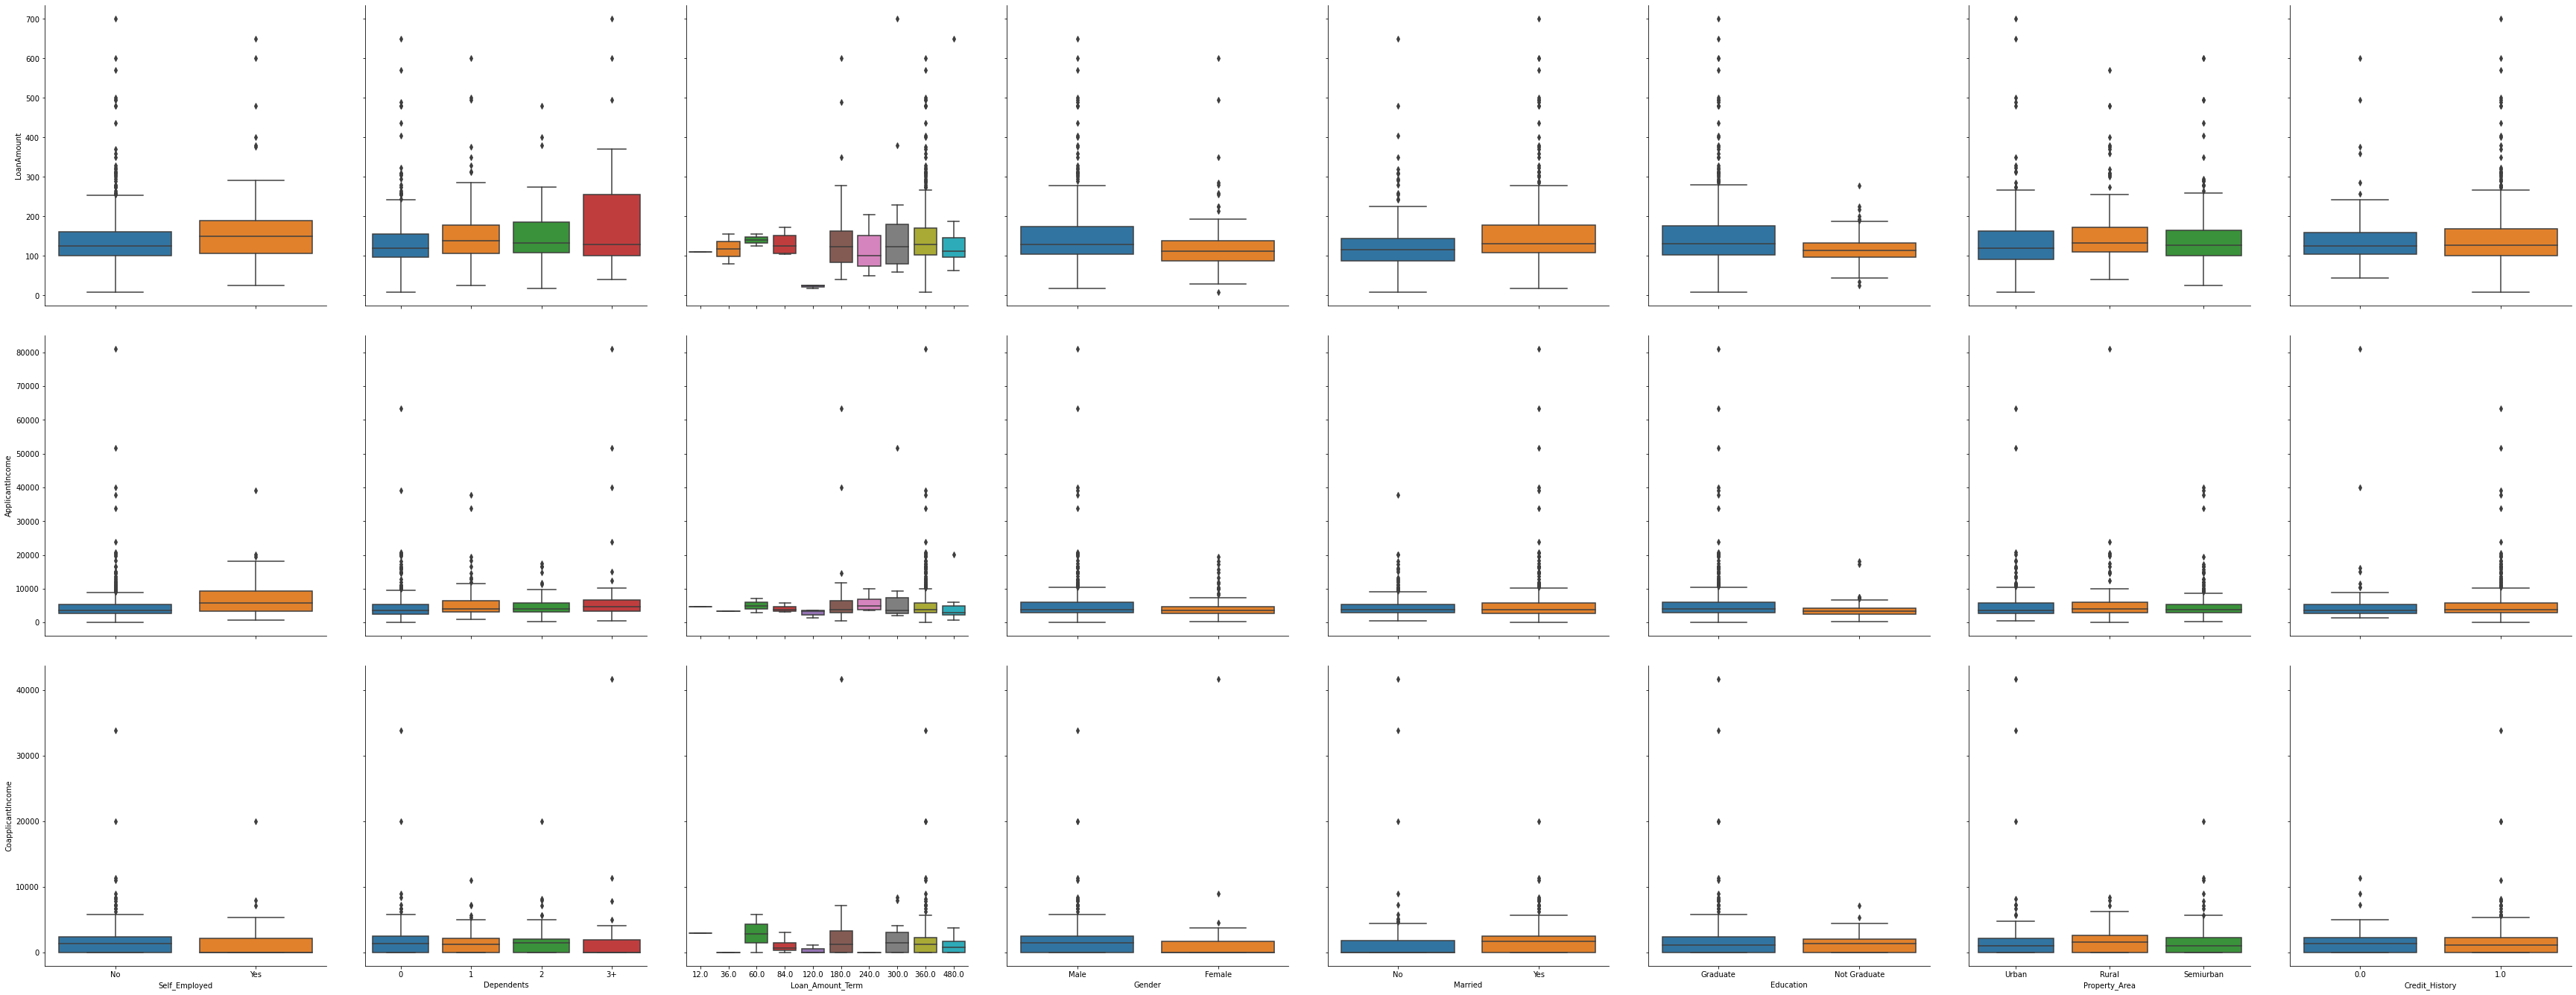

In [10]:
#Applicant income and loan amount requested are correlated
pg = sns.PairGrid(data=df,x_vars=cat_columns,y_vars=num_columns)
pg.fig.set_size_inches(50,20)
pg.map(sns.boxplot)

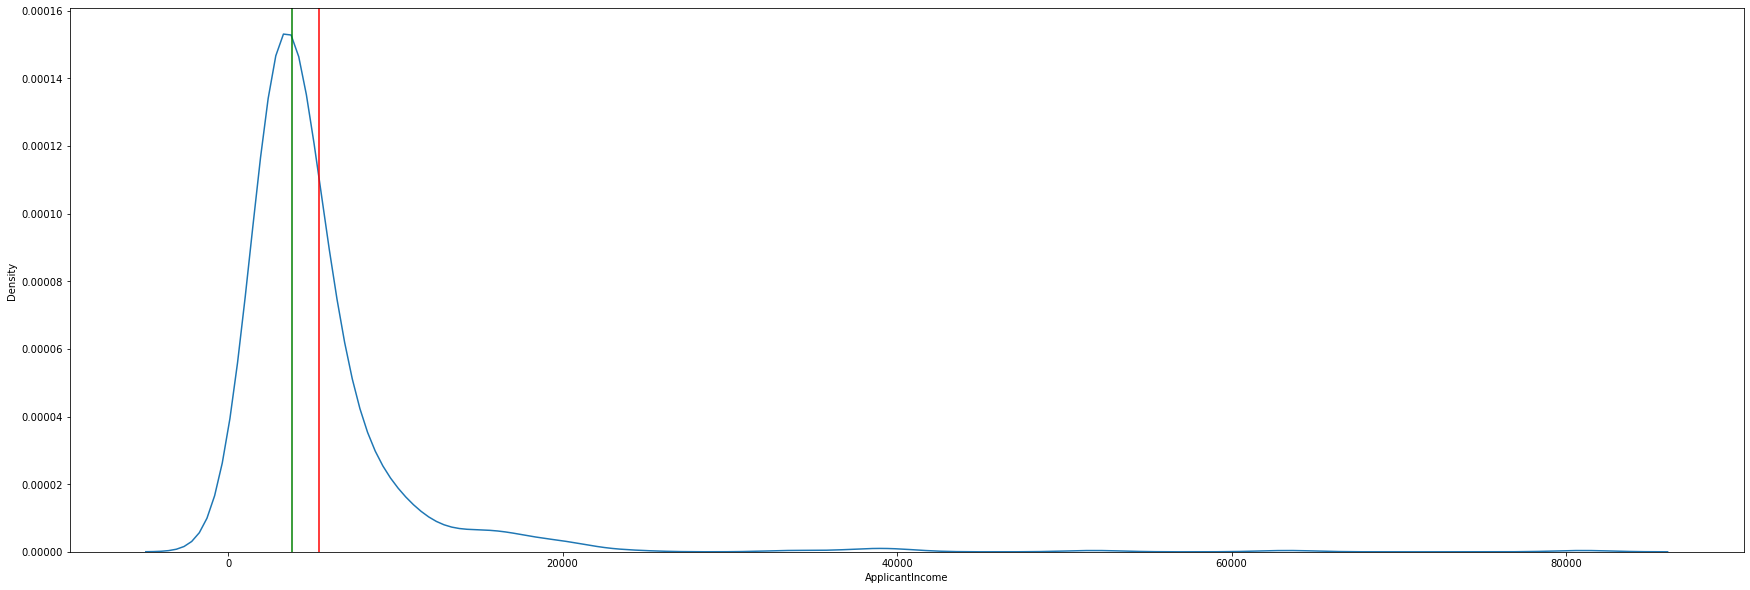

In [11]:
sns.kdeplot(df.ApplicantIncome)
plt.rcParams["figure.figsize"] = (10,5)
plt.axvline(x=df.ApplicantIncome.mean(),color='r')
plt.axvline(x=df.ApplicantIncome.median(),color='g')

<AxesSubplot:ylabel='ApplicantIncome'>

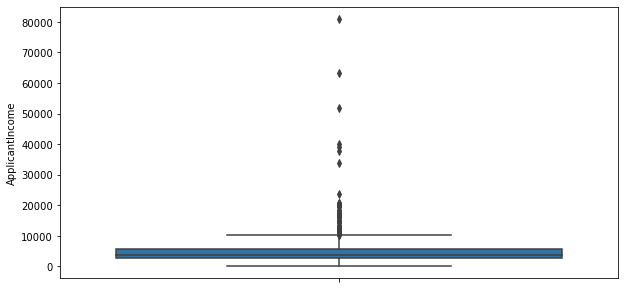

In [12]:
sns.boxplot(y=df.ApplicantIncome)

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

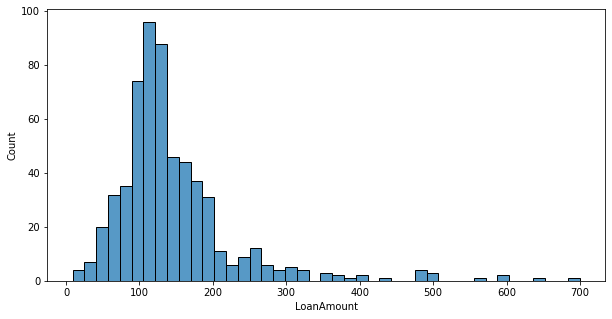

In [13]:
sns.histplot(data=df,x='LoanAmount')

In [14]:
df.Loan_Amount_Term = df.Loan_Amount_Term.astype('category')
df.Credit_History = df.Credit_History.astype('category')

In [15]:
df[cat_columns].describe(include='all')

,Self_Employed,Dependents,Loan_Amount_Term,Gender,Married,Education,Property_Area,Credit_History
count,582,599,600.0,601,611,614,614,564.0
unique,2,4,10.0,2,2,2,3,2.0
top,No,0,360.0,Male,Yes,Graduate,Semiurban,1.0
freq,500,345,512.0,489,398,480,233,475.0


<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

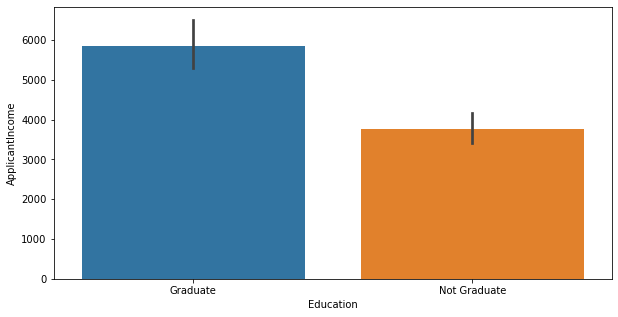

In [16]:

sns.barplot(data=df,x='Education',y='ApplicantIncome')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

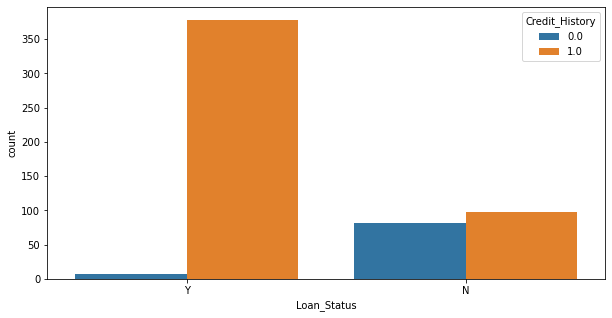

In [17]:
sns.countplot(data=df,x='Loan_Status',hue="Credit_History")

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

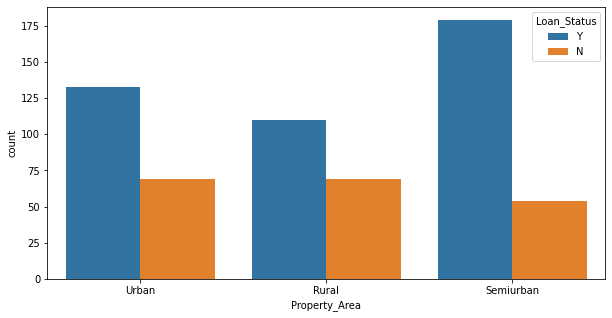

In [18]:
sns.countplot(data=df,x="Property_Area",hue="Loan_Status")

In [34]:
t = pd.crosstab(index=df.Property_Area,columns=df.Loan_Status,values=df.Loan_ID,aggfunc='count')

In [35]:
t

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [37]:
t.loc[:,"percentage approvals"] = 100*t["Y"]/(t["Y"]+t["N"])

In [38]:
t

Loan_Status,N,Y,percentage approvals
Property_Area,,,
Rural,69,110,61.452514
Semiurban,54,179,76.824034
Urban,69,133,65.841584


In [42]:
df[["Loan_Status","LoanAmount","CoapplicantIncome","ApplicantIncome"]].groupby(["Loan_Status"]).agg(['mean','median'])

LoanAmount        CoapplicantIncome         ApplicantIncome  \
                   mean median              mean  median            mean   
Loan_Status                                                                
N            151.220994  129.0       1877.807292   268.0     5446.078125   
Y            144.294404  126.0       1504.516398  1239.5     5384.068720   

                     
             median  
Loan_Status          
N            3833.5  
Y            3812.5

<AxesSubplot:xlabel='Dependents', ylabel='count'>

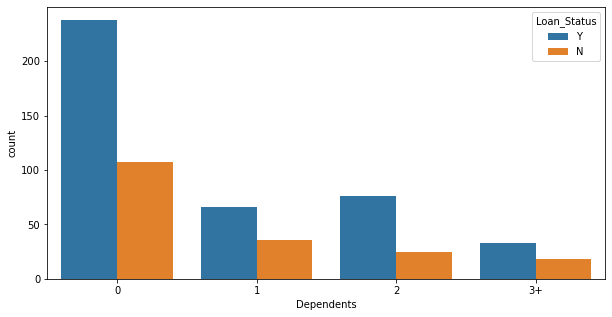

In [43]:
sns.countplot(data=df,x="Dependents",hue="Loan_Status")

In [45]:
k = pd.crosstab(index=df.Dependents,columns=df.Loan_Status,values=df.Loan_ID,aggfunc='count')

In [46]:
k.loc[:,"percentage approvals"] = 100*k["Y"]/(k["Y"]+k["N"])

In [47]:
k

Loan_Status,N,Y,percentage approvals
Dependents,,,
0,107,238,68.985507
1,36,66,64.705882
2,25,76,75.247525
3+,18,33,64.705882


<AxesSubplot:xlabel='Education', ylabel='count'>

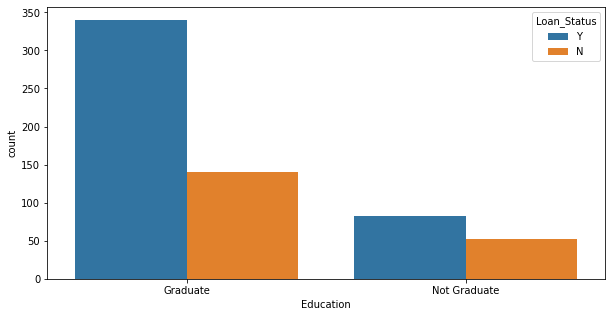

In [49]:
sns.countplot(data=df,x="Education",hue="Loan_Status")

In [50]:
k = pd.crosstab(index=df.Education,columns=df.Loan_Status,values=df.Loan_ID,aggfunc='count')
k.loc[:,"percentage approvals"] = 100*k["Y"]/(k["Y"]+k["N"])
k

Loan_Status,N,Y,percentage approvals
Education,,,
Graduate,140,340,70.833333
Not Graduate,52,82,61.194030


In [57]:
df.loc[:,"unknowns"] = df.isna().sum(axis=1)

In [58]:
df.unknowns.unique()

array([1, 0, 2, 3], dtype=int64)

<AxesSubplot:xlabel='unknowns', ylabel='count'>

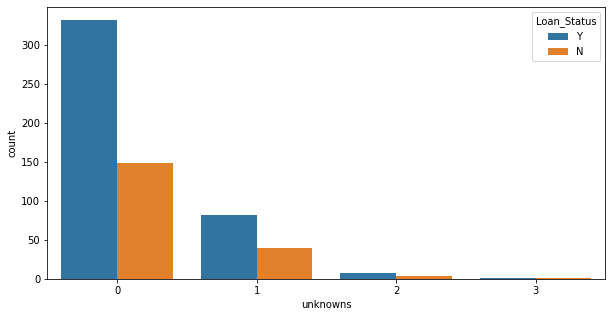

In [60]:
sns.countplot(data=df,x="unknowns",hue="Loan_Status")

In [61]:
k = pd.crosstab(index=df.unknowns,columns=df.Loan_Status,values=df.Loan_ID,aggfunc='count')
k.loc[:,"percentage approvals"] = 100*k["Y"]/(k["Y"]+k["N"])
k

Loan_Status,N,Y,percentage approvals
unknowns,,,
0,148,332,69.166667
1,39,82,67.768595
2,4,7,63.636364
3,1,1,50.000000


# Observations

1. 